## Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import inflection
import warnings

warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('../dataset/Clicked_Ads_Dataset.csv')
df.sample()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
895,895,80.99,26,248653160.0,207.53,Laki-Laki,6/10/2016 3:56,No,Bekasi,Jawa Barat,Finance


## Lowercase column names

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = [inflection.underscore(col) for col in df.columns]
df.columns = df.columns.str.replace(" ", "_")
df.sample()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
813,74.18,28,489119260.0,203.87,Perempuan,1/20/2016 2:31,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,House


## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  987 non-null    float64
 1   age                       1000 non-null   int64  
 2   area_income               987 non-null    float64
 3   daily_internet_usage      989 non-null    float64
 4   male                      997 non-null    object 
 5   timestamp                 1000 non-null   object 
 6   clicked_on_ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [6]:
from common_function import dataset_summary
summary = dataset_summary(df)
summary.T

,0,1,2,3,4,5,6,7,8,9
variable,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,category
no_unique,890,43,987,955,2,997,2,30,16,10
pandas_dtype,float64,int64,float64,float64,object,object,object,object,object,object
missing_value,13,0,13,11,3,0,0,0,0,0
%_missing_values,1.3,0.0,1.3,1.1,0.3,0.0,0.0,0.0,0.0,0.0
unique_value,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88....","[35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 2...","[432837300.0, 479092950.00000006, 418501580.0,...","[256.09, 193.77, 236.5, 245.89, 225.58, 226.74...","[Perempuan, Laki-Laki, nan]","[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3...","[No, Yes]","[Jakarta Timur, Denpasar, Surabaya, Batam, Med...","[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim...","[Furniture, Food, Electronic, House, Finance, ..."


**Observasi**
* Dataset memiliki **1000 baris** dan **10 kolom** dengan rincian 4 kolom numerikal dan 6 kolom kategorikal.
* Seluruh kolom memiliki tipe data yang sesuai dengan jenis variabelnya namun untuk **timestamp** butuh di-parsing ke tipe **datetime**.
* Ada empat kolom yang memiliki missing values yaitu **daily_time_spent_on_site**, **area_income**, **daily_internet_usage**, dan **male**. Jumlah missing values hanya sekitar **1%** dari total baris dataset.

In [7]:
# split numerical and categorical columns
numerical = ['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage']
categorical = ['male', 'timestamp', 'city', 'province', 'category']
target = 'clicked_on_ad'

### Descriptive Statistics

In [8]:
df[numerical].describe().round(2)

,daily_time_spent_on_site,age,area_income,daily_internet_usage
count,987.00,1000.00,9.870000e+02,989.00
mean,64.93,36.01,3.848647e+08,179.86
std,15.84,8.79,9.407999e+07,43.87
min,32.60,19.00,9.797550e+07,104.78
25%,51.27,29.00,3.286330e+08,138.71
50%,68.11,35.00,3.990683e+08,182.65
75%,78.46,42.00,4.583554e+08,218.79
max,91.43,61.00,5.563936e+08,267.01


Dari nilai **mean** dan **median** dapat diperkirakan distribusi dari suatu feature. Berikut ini kemungkinan distribusi setiap feature.
* **daily_time_spent_on_site** dan **area_income** memiliki distribusi **skewed** karena perbedaan nilai mean dan median yang agak jauh.
* **age** dan **daily_internet_usage** memiliki distribusi mendekati **normal** karena perbedaan nilai mean dan median dekat.

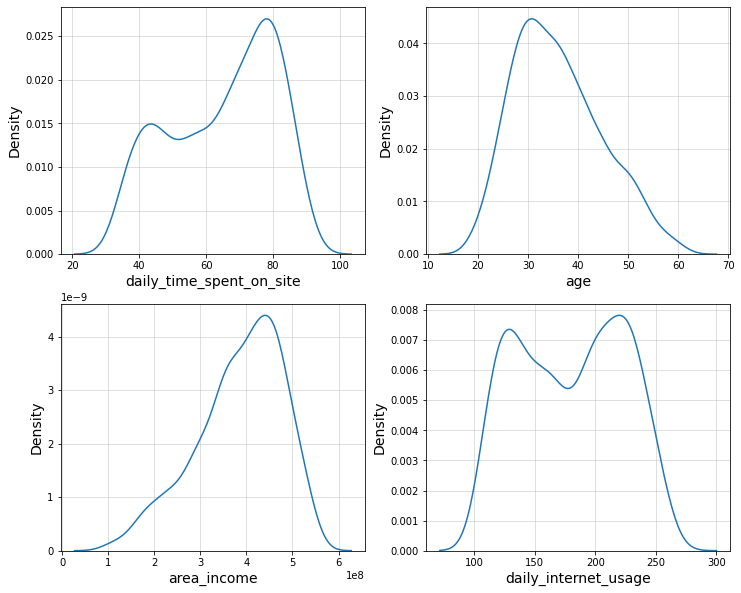

In [9]:
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[col])
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)

plt.show()

In [10]:
desc_cats = df[categorical].describe().T
desc_cats['frac'] = 100 * desc_cats['freq'] / desc_cats['count']
desc_cats

,count,unique,top,freq,frac
male,997,2,Perempuan,518,51.955868
timestamp,1000,997,5/26/2016 15:40,2,0.2
city,1000,30,Surabaya,64,6.4
province,1000,16,Daerah Khusus Ibukota Jakarta,253,25.3
category,1000,10,Otomotif,112,11.2


**Observasi**
* Gender yang mendominasi adalah **Perempuan** dengan jumlah **52%** dari seluruh jumlah baris.
* Jumlah kategori **Yes** dan **No** pada kolom **clicked_on_ad** seimbang.
* Kota yang paling banyak muncul di dataset adalah **Surabaya** sedangkan untuk provinsi adalah **DKI Jakarta**.
* **Otomotif** merupakan kategori yang paling sering dikunjungi user dengan persentase **11%**.

### Univariate analysis

In [11]:
df.groupby('clicked_on_ad').agg({
    'daily_time_spent_on_site': 'median', 
    'age': 'median', 
    'area_income': 'median', 
    'daily_internet_usage': 'median'
})

,daily_time_spent_on_site,age,area_income,daily_internet_usage
clicked_on_ad,,,,
No,77.615,31.0,436334990.0,216.50
Yes,51.500,40.0,344980090.0,138.79


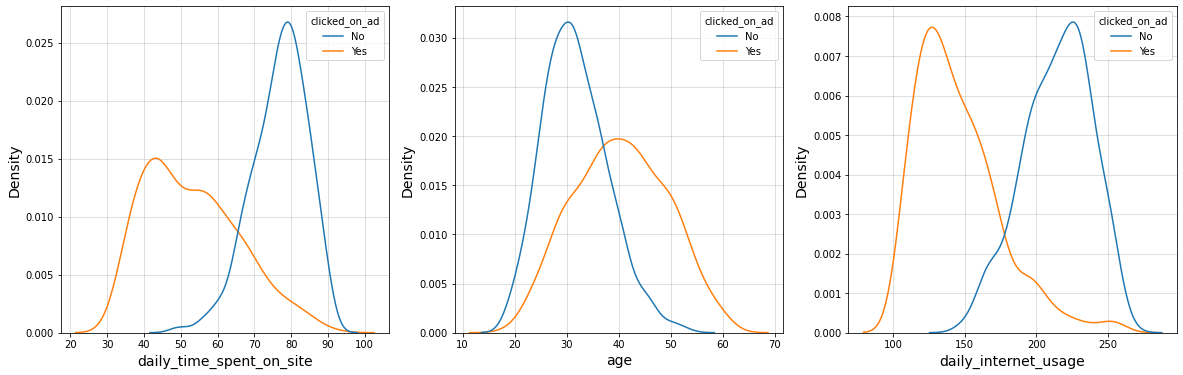

In [12]:
plt.figure(figsize=(20,6))
for i, col in enumerate(['daily_time_spent_on_site', 'age', 'daily_internet_usage']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(
        x=df[col],
        hue=df['clicked_on_ad'],
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)

plt.show()

In [13]:
df.groupby('clicked_on_ad').agg({
    'daily_time_spent_on_site': 'median', 
    'age': 'median', 
    'area_income': 'median', 
    'daily_internet_usage': 'median'
})

,daily_time_spent_on_site,age,area_income,daily_internet_usage
clicked_on_ad,,,,
No,77.615,31.0,436334990.0,216.50
Yes,51.500,40.0,344980090.0,138.79


**Observasi**
* User yang mengklik ad (Yes) merupakan user dengan **daily time spent on site** sebesar **51,5 menit** yang mana berbeda sekitar 26 menit dengan user yang tidak mengklik ad (No) (**77,6 menit**).
* Rata-rata umur user yang mengklik ad sekitar **40 tahun** sedangkan yang tidak mengklik ad **31 tahun**.
* **Daily internet usage** pada user yang mengklik ad sebesar **138.8 menit** rata-rata sedangkan untuk user yang tidak mengklik ad sebesar **216.5 menit**.

### Bivariate analysis

<Figure size 1440x1440 with 0 Axes>

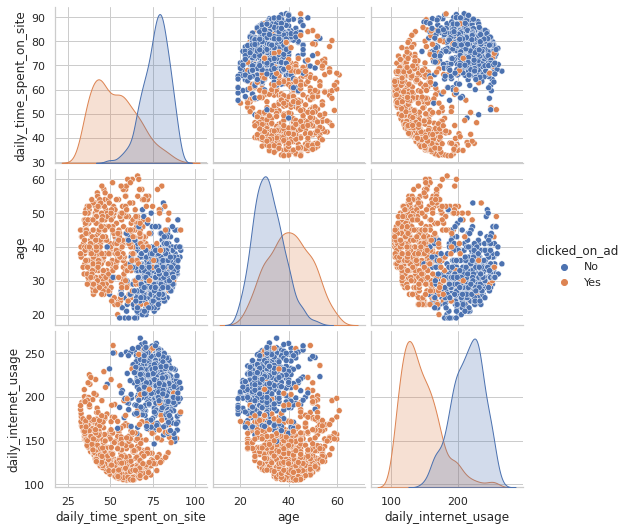

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))
col_to_plot = ['daily_time_spent_on_site', 'age', 'daily_internet_usage', 'clicked_on_ad']
sns.pairplot(data=df[col_to_plot], diag_kind='kde', hue='clicked_on_ad')
plt.show()

**Observasi**
* Semakin tua umur user serta semakin sedikit daily internet usage dan daily time spent on site maka akan cenderung mengklik sebuah ad
* Ada kemungkinan target ads yang dituju untuk pekerja produktif yang berumur 20-60 tahun.

### Multivariate Analysis

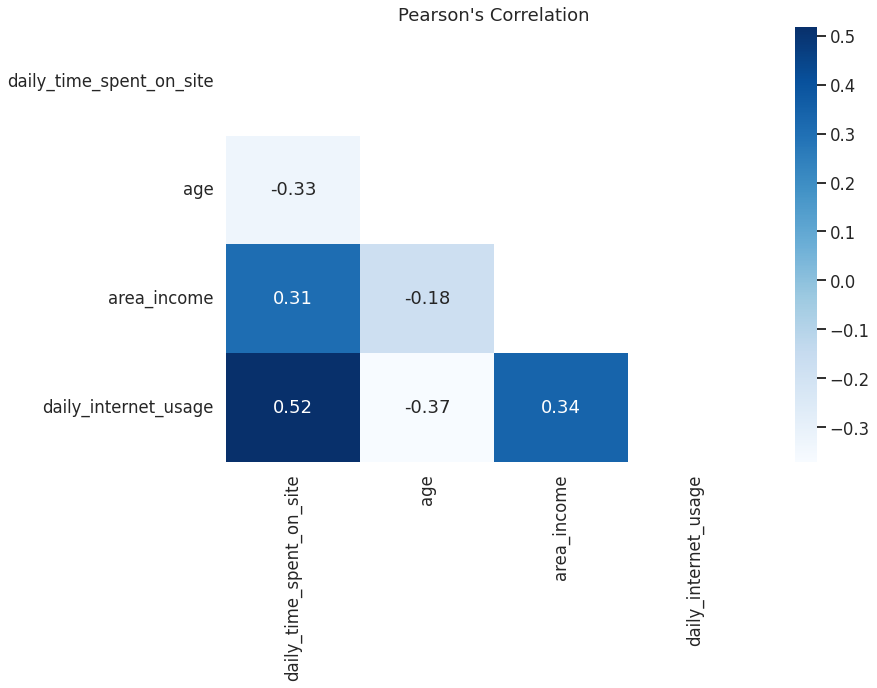

In [15]:
sns.set_theme(context='talk', style="whitegrid")
data = df[numerical].corr(method='pearson')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(
    data, ax=ax,
    mask=np.triu(np.ones_like(data)),
    cmap='Blues', annot=True, fmt='.2f'
)
plt.title("Pearson's Correlation")
plt.show()

**Observasi**
* Kolom dengan korelasi positif tertinggi 0.52 adalah kolom **daily_internet_usage** dan **daily_time_spent_on_site**. Hal ini sesuai dengan kehidupan sehari-hari yang mana semakin tinggi pengunaan internet maka semakin tinggi juga waktu yang dihabiskan pada site tertentu.
* Korelasi **area_income** terhadap **age** cukup tinggi 0.34 sehingga ada kecenderungan semakin tua umur maka semakin tinggi penghasilan user tersebut.

## Feature Engineering

### Timestamp

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.week
df['day'] = df['timestamp'].dt.day
df['hour_float'] = df['timestamp'].dt.hour + (df['timestamp'].dt.minute / 60) 

col_to_show = ['timestamp', 'year', 'month', 'day', 'hour_float']
df[col_to_show].sample(5)

,timestamp,year,month,day,hour_float
364,2016-04-21 12:34:00,2016,4,21,12.566667
643,2016-02-26 01:18:00,2016,2,26,1.300000
566,2016-02-24 19:08:00,2016,2,24,19.133333
294,2016-07-20 23:08:00,2016,7,20,23.133333
813,2016-01-20 02:31:00,2016,1,20,2.516667


### City and Province

In [17]:
df['city_province'] = df['city'].astype(str) + "_" + df['province'].astype(str)
df['city_province'].unique()

array(['Jakarta Timur_Daerah Khusus Ibukota Jakarta', 'Denpasar_Bali',
       'Surabaya_Jawa Timur', 'Batam_Kepulauan Riau',
       'Medan_Sumatra Utara',
       'Jakarta Barat_Daerah Khusus Ibukota Jakarta',
       'Bandung_Jawa Barat', 'Bandar Lampung_Lampung',
       'Jakarta Pusat_Daerah Khusus Ibukota Jakarta', 'Depok_Jawa Barat',
       'Serang_Banten', 'Padang_Sumatra Barat', 'Semarang_Jawa Tengah',
       'Makassar_Sulawesi Selatan', 'Malang_Jawa Timur',
       'Jakarta Utara_Daerah Khusus Ibukota Jakarta',
       'Pontianak_Kalimantan Barat',
       'Jakarta Selatan_Daerah Khusus Ibukota Jakarta',
       'Tasikmalaya_Jawa Barat', 'Surakarta_Jawa Tengah',
       'Bekasi_Jawa Barat', 'Tangerang_Banten', 'Cimahi_Jawa Barat',
       'Banjarmasin_Kalimantan Selatan', 'Palembang_Sumatra Selatan',
       'Samarinda_Kalimantan Timur', 'Pakanbaru_Riau',
       'Tangerang Selatan_Banten', 'Bogor_Jawa Barat',
       'Balikpapan_Kalimantan Timur'], dtype=object)

## Data Preprocessing

### Handle missing values

Seluruh feature yang memiliki missing values akan di-impute dengan median kecuali feature **male** yang di-impute dengan mode nya.

In [18]:
for col in ['daily_time_spent_on_site', 'area_income', 'daily_internet_usage']:
    df[col] = df[col].fillna(df[col].median())
    
df['male'] = df['male'].fillna(df[col].mode()[0])
df.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
male                        0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
category                    0
year                        0
month                       0
week                        0
day                         0
hour_float                  0
city_province               0
dtype: int64

### Handle duplicate data

In [19]:
df.duplicated().sum()

0

Tidak ada data duplikasi.

### Feature Encoding

In [20]:
df_modified = df.copy()

#### Male

In [21]:
df_modified['male'] = np.where(df_modified['male'] == 'Laki-Laki', 1, 0)
df_modified['male'].unique()

array([0, 1])

#### Clicked on Ad

In [22]:
df_modified['clicked_on_ad'] = np.where(df_modified['clicked_on_ad'] == 'Yes', 1, 0)
df_modified['clicked_on_ad'].unique()

array([0, 1])

#### City Province and Category

In [23]:
from feature_engine.encoding import OneHotEncoder

one_hot = OneHotEncoder(
    variables=['city_province', 'category'],
    drop_last_binary=True
)

df_modified = one_hot.fit_transform(df_modified)
df_modified.sample(2)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,timestamp,clicked_on_ad,city,province,year,...,category_Furniture,category_Food,category_Electronic,category_House,category_Finance,category_Travel,category_Health,category_Bank,category_Fashion,category_Otomotif
47,85.4,43,469411040.0,198.72,0,2016-06-08 18:54:00,0,Banjarmasin,Kalimantan Selatan,2016,...,0,0,0,0,0,0,0,1,0,0
142,55.6,44,461676320.0,124.38,1,2016-06-14 11:59:00,1,Bekasi,Jawa Barat,2016,...,0,0,0,0,1,0,0,0,0,0


## Split the data

In [24]:
from sklearn.model_selection import train_test_split

drop_cols = ['timestamp', 'clicked_on_ad', 'city', 'province']
X = df_modified.drop(drop_cols, axis=1)
y = df_modified['clicked_on_ad']

# split 80-20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train data shape: {X_train_80.shape}")
print(f"Test data shape: {X_test_20.shape}")

Train data shape: (800, 50)
Test data shape: (200, 50)


In [25]:
X_train_80.sample(5)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,year,month,week,day,hour_float,...,category_Furniture,category_Food,category_Electronic,category_House,category_Finance,category_Travel,category_Health,category_Bank,category_Fashion,category_Otomotif
151,68.11,35,507674020.0,172.10,0,2016,5,21,28,20.683333,...,0,0,0,0,0,0,0,0,0,1
145,37.47,44,320015360.0,141.89,1,2016,1,4,26,3.933333,...,0,0,0,0,0,0,1,0,0,0
149,68.61,57,432392380.0,150.29,0,2016,4,14,10,19.800000,...,0,0,0,0,0,0,0,0,0,1
861,68.25,29,492273600.0,220.08,0,2016,2,7,15,16.300000,...,0,0,0,0,0,0,0,1,0,0
150,58.18,25,483789880.0,176.28,1,2016,2,6,10,6.616667,...,1,0,0,0,0,0,0,0,0,0


## Modelling

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes  import GaussianNB

from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)

### Experiment setup

* Untuk data split yang digunakan ada dua macam yaitu **70-30** dan **80-20**.
* Data dinormalisasi dan tidak dinormalisasi.
* Model klasifikasi yang digunakan yaitu **Logistic Regression**, **Decision Tree**, **Random Forest** dan **Naive Bayes**.

In [27]:
# split 70-30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

In [28]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

### Experiment #1: Split 80-20

#### Without Normalization

In [29]:
print("Split 80-20 without Normalization")

logistic_regression.fit(X_train_80, y_train_80)
y_pred = logistic_regression.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Logistic Regression): {100* accuracy:.0f}%")

decision_tree.fit(X_train_80, y_train_80)
y_pred = decision_tree.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Decision Tree): {100* accuracy:.0f}%")

random_forest.fit(X_train_80, y_train_80)
y_pred = random_forest.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Random Forest): {100* accuracy:.0f}%")

naive_bayes.fit(X_train_80, y_train_80)
y_pred = naive_bayes.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Decision Tree): {100* accuracy:.0f}%")

Split 80-20 without Normalization
Accuracy (Logistic Regression): 44%
Accuracy (Decision Tree): 91%
Accuracy (Random Forest): 94%
Accuracy (Decision Tree): 66%


#### With Normalization

In [30]:
print("Split 80-20 with Normalization")

nums = [
    'daily_time_spent_on_site', 'age', 'area_income',
    'daily_internet_usage', 'year', 'month', 
    'week', 'day', 'hour_float'
]
num_scaled = make_column_transformer(
    (MinMaxScaler(), nums), 
    remainder='passthrough'
)

model = make_pipeline(num_scaled, logistic_regression)
model.fit(X_train_80, y_train_80)
y_pred = model.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Logistic Regression): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, decision_tree)
model.fit(X_train_80, y_train_80)
y_pred = model.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Decision Tree): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, random_forest)
model.fit(X_train_80, y_train_80)
y_pred = model.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Random Forest): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, naive_bayes)
model.fit(X_train_80, y_train_80)
y_pred = model.predict(X_test_20)
accuracy = accuracy_score(y_test_20, y_pred)
print(f"Accuracy (Naive Bayes): {100* accuracy:.0f}%")

Split 80-20 with Normalization
Accuracy (Logistic Regression): 94%
Accuracy (Decision Tree): 90%
Accuracy (Random Forest): 94%
Accuracy (Naive Bayes): 86%


### Experiment #2: Split 70-30

#### Without Normalization

In [31]:
print("Split 70-30 without Normalization")

logistic_regression.fit(X_train_70, y_train_70)
y_pred = logistic_regression.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Logistic Regression): {100* accuracy:.0f}%")

decision_tree.fit(X_train_70, y_train_70)
y_pred = decision_tree.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Decision Tree): {100* accuracy:.0f}%")

random_forest.fit(X_train_70, y_train_70)
y_pred = random_forest.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Random Forest): {100* accuracy:.0f}%")

naive_bayes.fit(X_train_70, y_train_70)
y_pred = naive_bayes.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Naive Bayes): {100* accuracy:.0f}%")

Split 70-30 without Normalization
Accuracy (Logistic Regression): 50%
Accuracy (Decision Tree): 95%
Accuracy (Random Forest): 97%
Accuracy (Naive Bayes): 75%


#### With Normalization

In [32]:
print("Split 70-30 with Normalization")

nums = [
    'daily_time_spent_on_site', 'age', 'area_income',
    'daily_internet_usage', 'year', 'month', 
    'week', 'day', 'hour_float'
]
num_scaled = make_column_transformer(
    (MinMaxScaler(), nums), 
    remainder='passthrough'
)

model = make_pipeline(num_scaled, logistic_regression)
model.fit(X_train_70, y_train_70)
y_pred = model.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Logistic Regression): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, decision_tree)
model.fit(X_train_70, y_train_70)
y_pred = model.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Decision Tree): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, random_forest)
model.fit(X_train_70, y_train_70)
y_pred = model.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Random Forest): {100* accuracy:.0f}%")

model = make_pipeline(num_scaled, naive_bayes)
model.fit(X_train_70, y_train_70)
y_pred = model.predict(X_test_30)
accuracy = accuracy_score(y_test_30, y_pred)
print(f"Accuracy (Naive Bayes): {100* accuracy:.0f}%")

Split 70-30 with Normalization
Accuracy (Logistic Regression): 97%
Accuracy (Decision Tree): 96%
Accuracy (Random Forest): 97%
Accuracy (Naive Bayes): 86%


**Observasi**
* Model terbaik yang memiliki **accuracy 97%** adalah **Random Forest** dengan rasio data split sebesar **70% train** dan **30% test** serta **tanpa normalisasi**.

### Confusion Matrix for best model

In [33]:
random_forest.fit(X_train_70, y_train_70)
y_pred = random_forest.predict(X_test_30)
print(classification_report(y_test_30, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.97      0.97      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



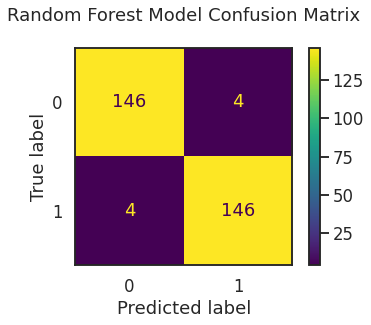

In [34]:
sns.set_theme(style="white", context='talk')
cm = confusion_matrix(y_test_30, y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot()
plt.title("Random Forest Model Confusion Matrix\n")
plt.show()

### Feature Importance and Business Insight

In [35]:
X_test = X_test_30.copy()
X_test = X_test.rename(
    columns={
        'daily_time_spent_on_site': 'Daily Time Spent On Site', 
        'age': 'Age', 
        'area_income': 'Area Income',
        'daily_internet_usage': 'Daily Internet Usage', 
        'male': 'Male', 
        'year': 'Year', 
        'month': 'Month', 
        'week': 'Week', 
        'day': 'Day',
        'hour_float': 'Hour',
        'category_Furniture': 'Furniture',
        'category_Health': 'Health',
        'category_Bank': 'Bank',
        'category_Finance': 'Finance',
        'category_Travel': 'Travel',
        'category_Fashion': 'Fashion',
        'city_province_Semarang_Jawa Tengah': 'Semarang, Jawa Tengah',
        'city_province_Jakarta Pusat_Daerah Khusus Ibukota Jakarta': 'Jakarta Pusat, DKI Jakarta',
        'city_province_Palembang_Sumatra Selatan': 'Palembang, Sumatra Selatan',
        'city_province_Surabaya_Jawa Timur': 'Surabaya, Jawa Timur',
        'city_province_Jakarta Barat_Daerah Khusus Ibukota Jakarta': 'Jakarta Barat, DKI Jakarta',
    }
)

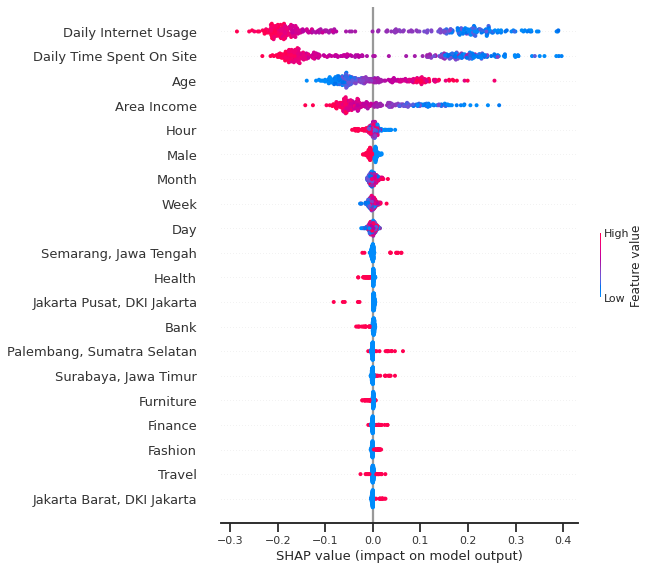

In [36]:
# load javascript visualization to show a SHAP plot in jupyter
import shap
shap.initjs()

explainer = shap.TreeExplainer(random_forest)
shap_val = explainer.shap_values(X_test)

shap.summary_plot(shap_val[1], X_test)

**Insight**
* User dengan **daily internet usage** dan **daily time spent on site** yang **rendah** cenderung memberi kontribusi yang besar dalam mengklik iklan.
* User berumur **lebih tua** cenderung mengklik iklan.
* Dua feature yang digunakan untuk menyusun strategi marketing adalah **age** dan **daily time spent on site**

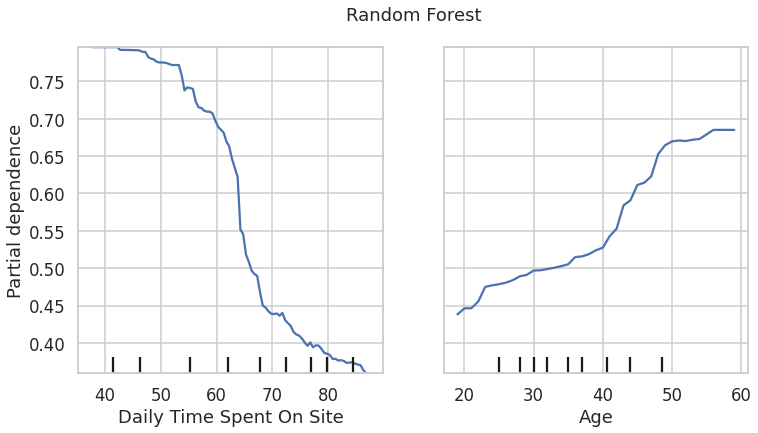

In [37]:
from sklearn.inspection import PartialDependenceDisplay
feature_to_show = ["Daily Time Spent On Site", "Age"]

sns.set_theme(style="whitegrid", context='talk')
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest\n")
ax.set_ylim([0, 1])
pdp_display = PartialDependenceDisplay.from_estimator(random_forest, X_test, feature_to_show, ax=ax)

Berdasarkan grafik partial dependence dapat ditarik sebuah **business insight** sebagai berikut.
1. Usia yang berpotensi mengklik ad atau iklan adalah usia 40 tahun ke atas dengan probabilitas lebih dari 0.5. Iklan yang dituju memungkinkan sesuai dengan preferensi user dengan rentang usia 40 tahun keatas.

**Rekomendasi**: Trafik iklan yang sudah di-setting agar selalu diarahkan ke user dengan usia 40 tahun ke atas. Untuk user 40 tahun ke bawah, perusahaan butuh riset ulang mengenai preferensi user-user tersebut agar dapat memberi iklan yang lebih tepat sasaran.

2. User dengan daily time spent on site dibawah 70 menit per hari memiliki peluang mengklik iklan lebih dari 0.5. Hal ini terjadi karena user-user di usia produktif mempunyai waktu yang sedikit untuk mengakses internet akibat kesibukan di dunia nyata.

**Rekomendasi**: Membuat campaign ad dengan keyword yang diselaraskan dengan durasi waktu misalnya mendapat promo tertentu untuk bertransaksi dengan batasan waktu 70 menit.

## Business Simulation

In [50]:
# modified test data
X_test_new = X_test_30.copy()
X_test_new['clicked_on_ad'] = y_test_30.copy()

# select the threshold based on PDP
values_threshold = 60

filter_for_click_false = X_test_new['clicked_on_ad'] == 0
func = lambda x: values_threshold if x >= values_threshold else x
X_test_new.loc[filter_for_click_false, 'daily_time_spent_on_site'] = X_test_new.loc[filter_for_click_false, 'daily_time_spent_on_site'].apply(func)

# prediction on test data
y_proba = random_forest.predict_proba(X_test_new.drop('clicked_on_ad', axis=1))[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# calculate convert visitors
total_treated_visitors = X_test_new[filter_for_click_false].shape[0]
potential_convert_visitors = ((X_test_new['clicked_on_ad'] == 0) & (y_pred == 1)).sum()
conversion_rate_after_treatment = potential_convert_visitors * 100 / X_test_new.shape[0]

# display the results
print(f"Values threshold: {age_values_threshold}")
print(f"Total users who get a treatment: {total_treated_visitors} visitors")
print(f"Convert-to-click visitors after get a treatment: {potential_convert_visitors} visitors")
print(f"Conversion Rate After Treatment: {conversion_rate_after_treatment:.2f}%")

Age values threshold: 60
Total users who get a treatment: 150 visitors
Convert-to-click visitors after get a treatment: 48 visitors
Conversion Rate After Treatment: 16.00%


In [ ]:
# modified test data
X_test_new = X_test.copy()
X_test_new['clicked_on_ad'] = y_test_30.copy()

# select the threshold based on PDP
age_values_threshold = 40

# change the age data for age <= 40
filter_for_click_false = X_test_new['clicked_on_ad'] == 0
func = lambda x: page_values_threshold if x <= page_values_threshold else x
X_test_new.loc[filter_for_revenue_false, 'page_values'] = X_test_new.loc[filter_for_revenue_false, 'page_values'].apply(func)

# prediction on test data
y_proba = model.predict_proba(X_test_new.drop('revenue', axis=1))[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# calculate convert visitors
total_treated_visitors = X_test[filter_for_revenue_false].shape[0]
potential_convert_visitors = ((X_test_new['revenue'] == 0) & (y_pred == 1)).sum()
purchase_rate_after_treatment = potential_convert_visitors * 100 / X_test_new.shape[0]

# display the results
print(f"Page values threshold: {page_values_threshold}")
print(f"Total visitors who get a treatment: {total_treated_visitors} visitors")
print(f"Convert-to-purchase visitors after get a treatment: {potential_convert_visitors} visitors")
print(f"Purchase Rate After Treatment: {purchase_rate_after_treatment:.2f}%")

In [53]:
198 * 40000

7920000